In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn import tree
# import warningsimport plotly.express as px
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/Admin/Desktop/Crop&weather/Dataset/crop_recommendation.csv")

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df = df.rename(columns={'label': 'Crop'})
print(df)


        N   P   K  temperature   humidity        ph    rainfall    Crop
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [6]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
df.size

17600

In [8]:
df.shape

(2200, 8)

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop'], dtype='object')

In [10]:
df['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
Crop            object
dtype: object

In [12]:
df['Crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: Crop, dtype: int64

In [13]:
print(df.isna().any())

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
Crop           False
dtype: bool


In [14]:
print(df.isna().mean())

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
Crop           0.0
dtype: float64


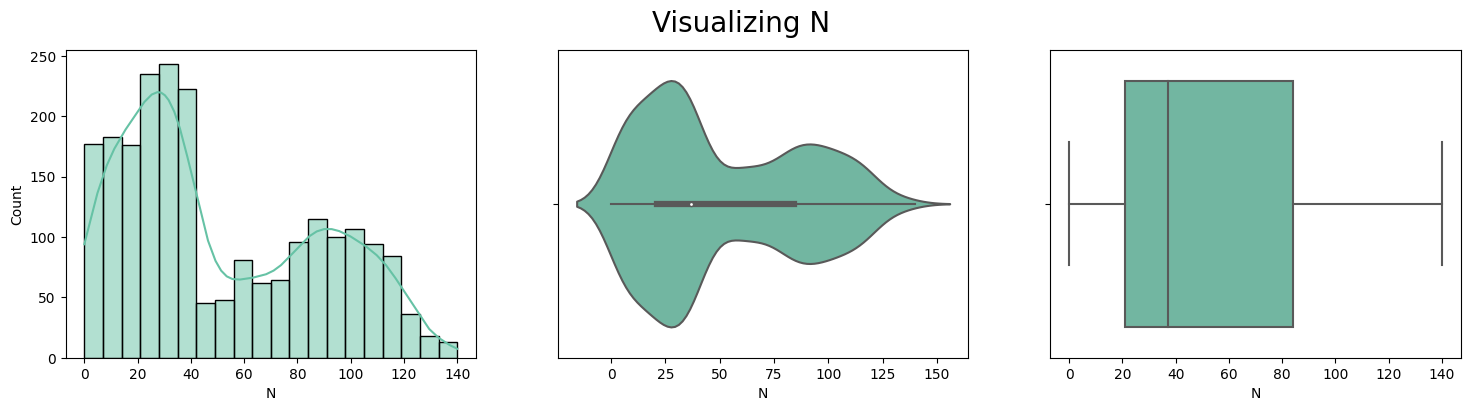

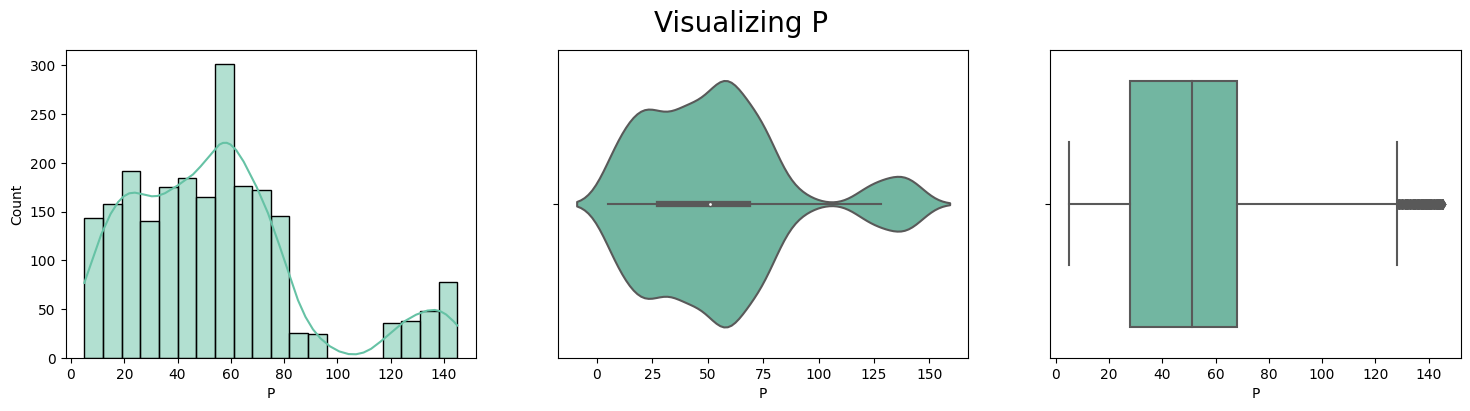

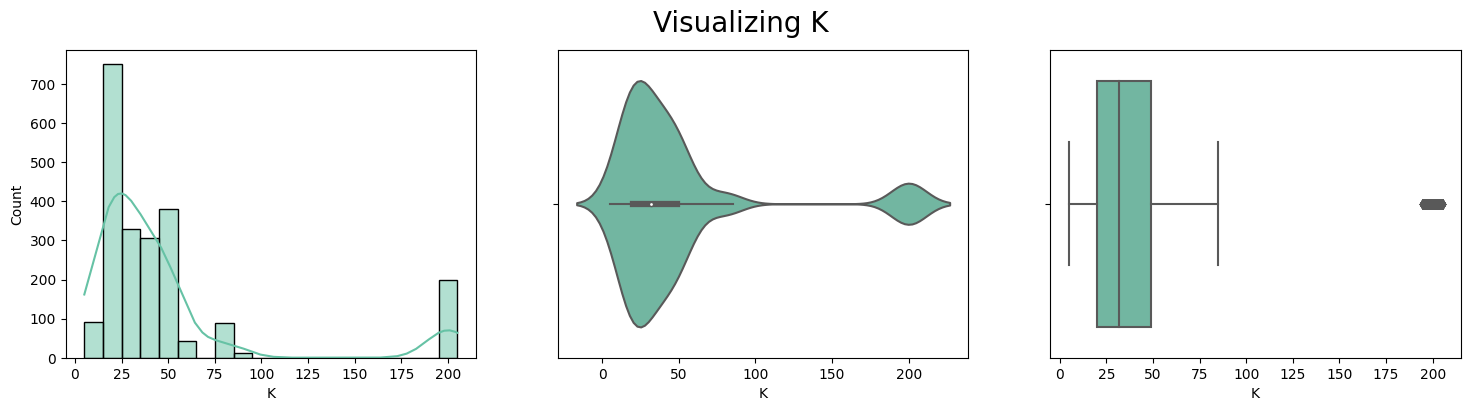

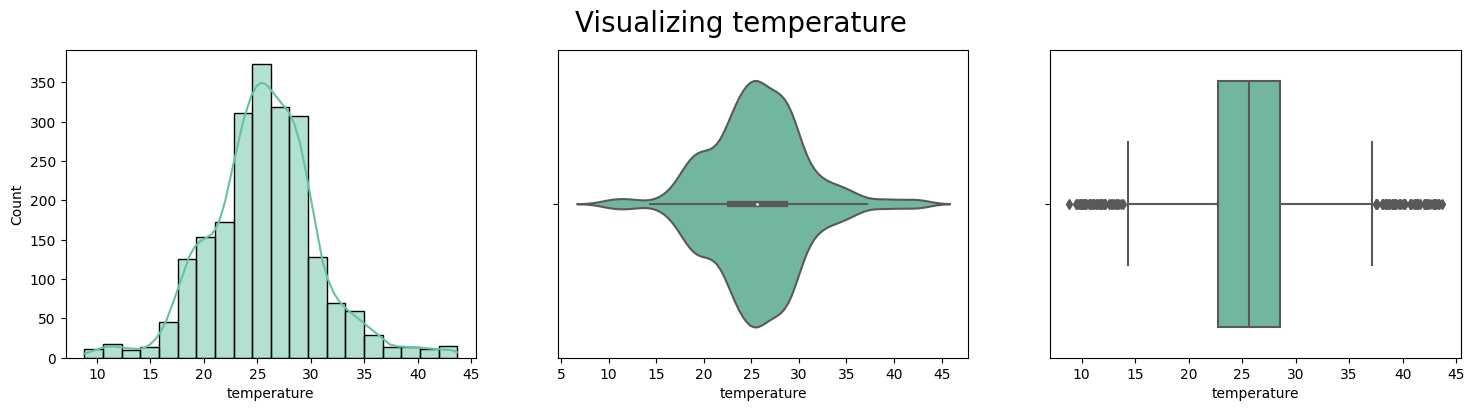

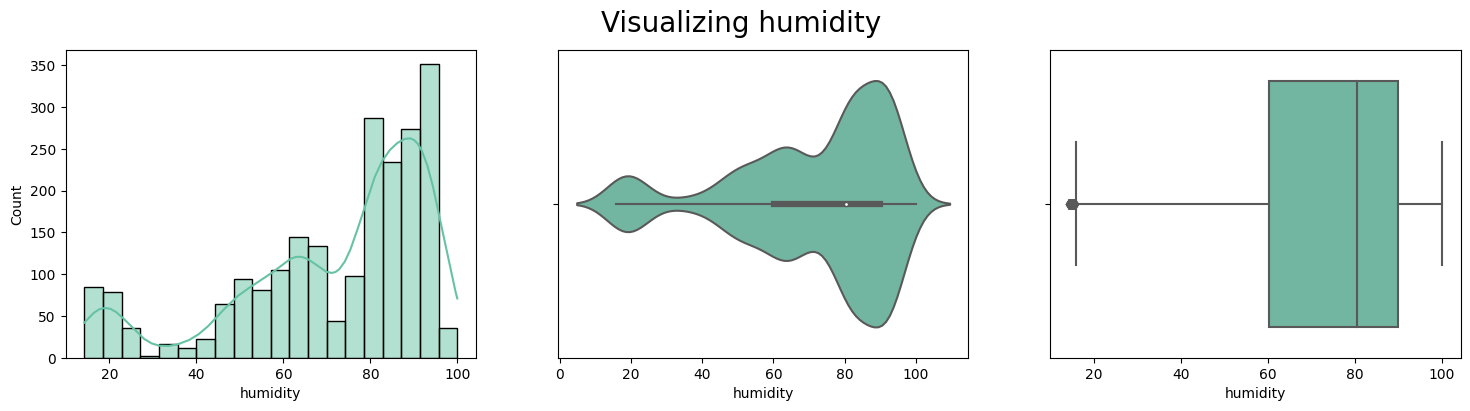

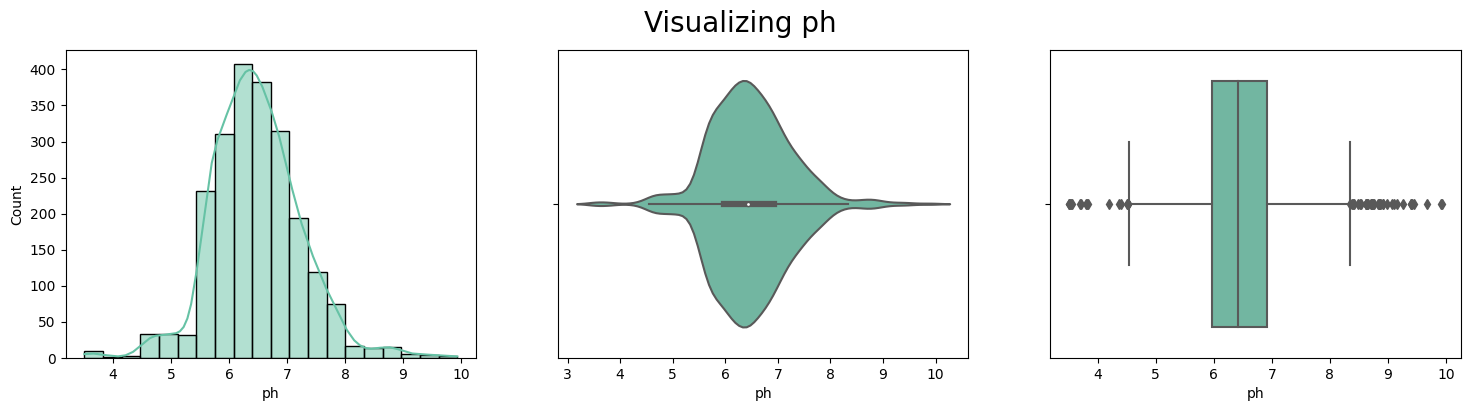

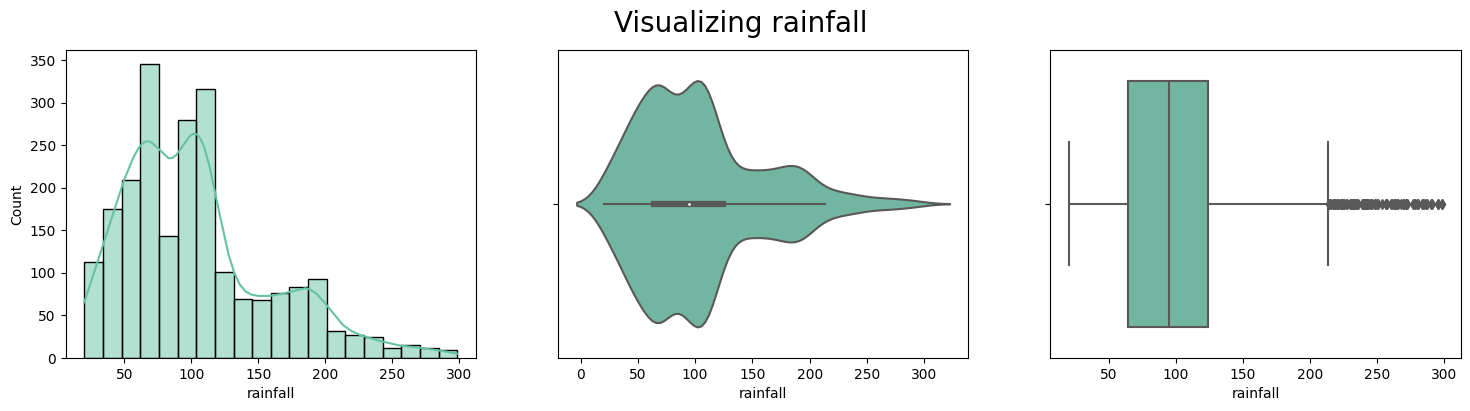

In [54]:
plt.style.use('fast')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

In [57]:
grouped = df.groupby(by='Crop').mean().reset_index()
grouped

,Crop,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [59]:
print(f'********************************')
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'********************************')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['Crop',i]].values:
        print(f'{j} --> {k}')
    print(f'********************************')

********************************
Top 5 Most N requiring crops:
********************************
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
********************************
Top 5 Most P requiring crops:
********************************
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
********************************
Top 5 Most K requiring crops:
********************************
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
********************************
Top 5 Most temperature requiring crops:
********************************
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
********************************
Top 5 Most humidity requiring crops:
********************************
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34280196089999
apple -

In [61]:
print(f'********************************')
for i in grouped.columns[1:]:
    print(f'Top 5 Least {i} requiring crops:')
    print(f'********************************')
    for j ,k in grouped.sort_values(by=i)[:5][['Crop',i]].values:
        print(f'{j} --> {k}')
    print(f'********************************')

********************************
Top 5 Least N requiring crops:
********************************
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73
********************************
Top 5 Least P requiring crops:
********************************
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75
********************************
Top 5 Least K requiring crops:
********************************
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79
********************************
Top 5 Least temperature requiring crops:
********************************
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132
********************************
Top 5 Least humidity requiring crops:
********************************
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295
pigeonpeas --> 48.061633

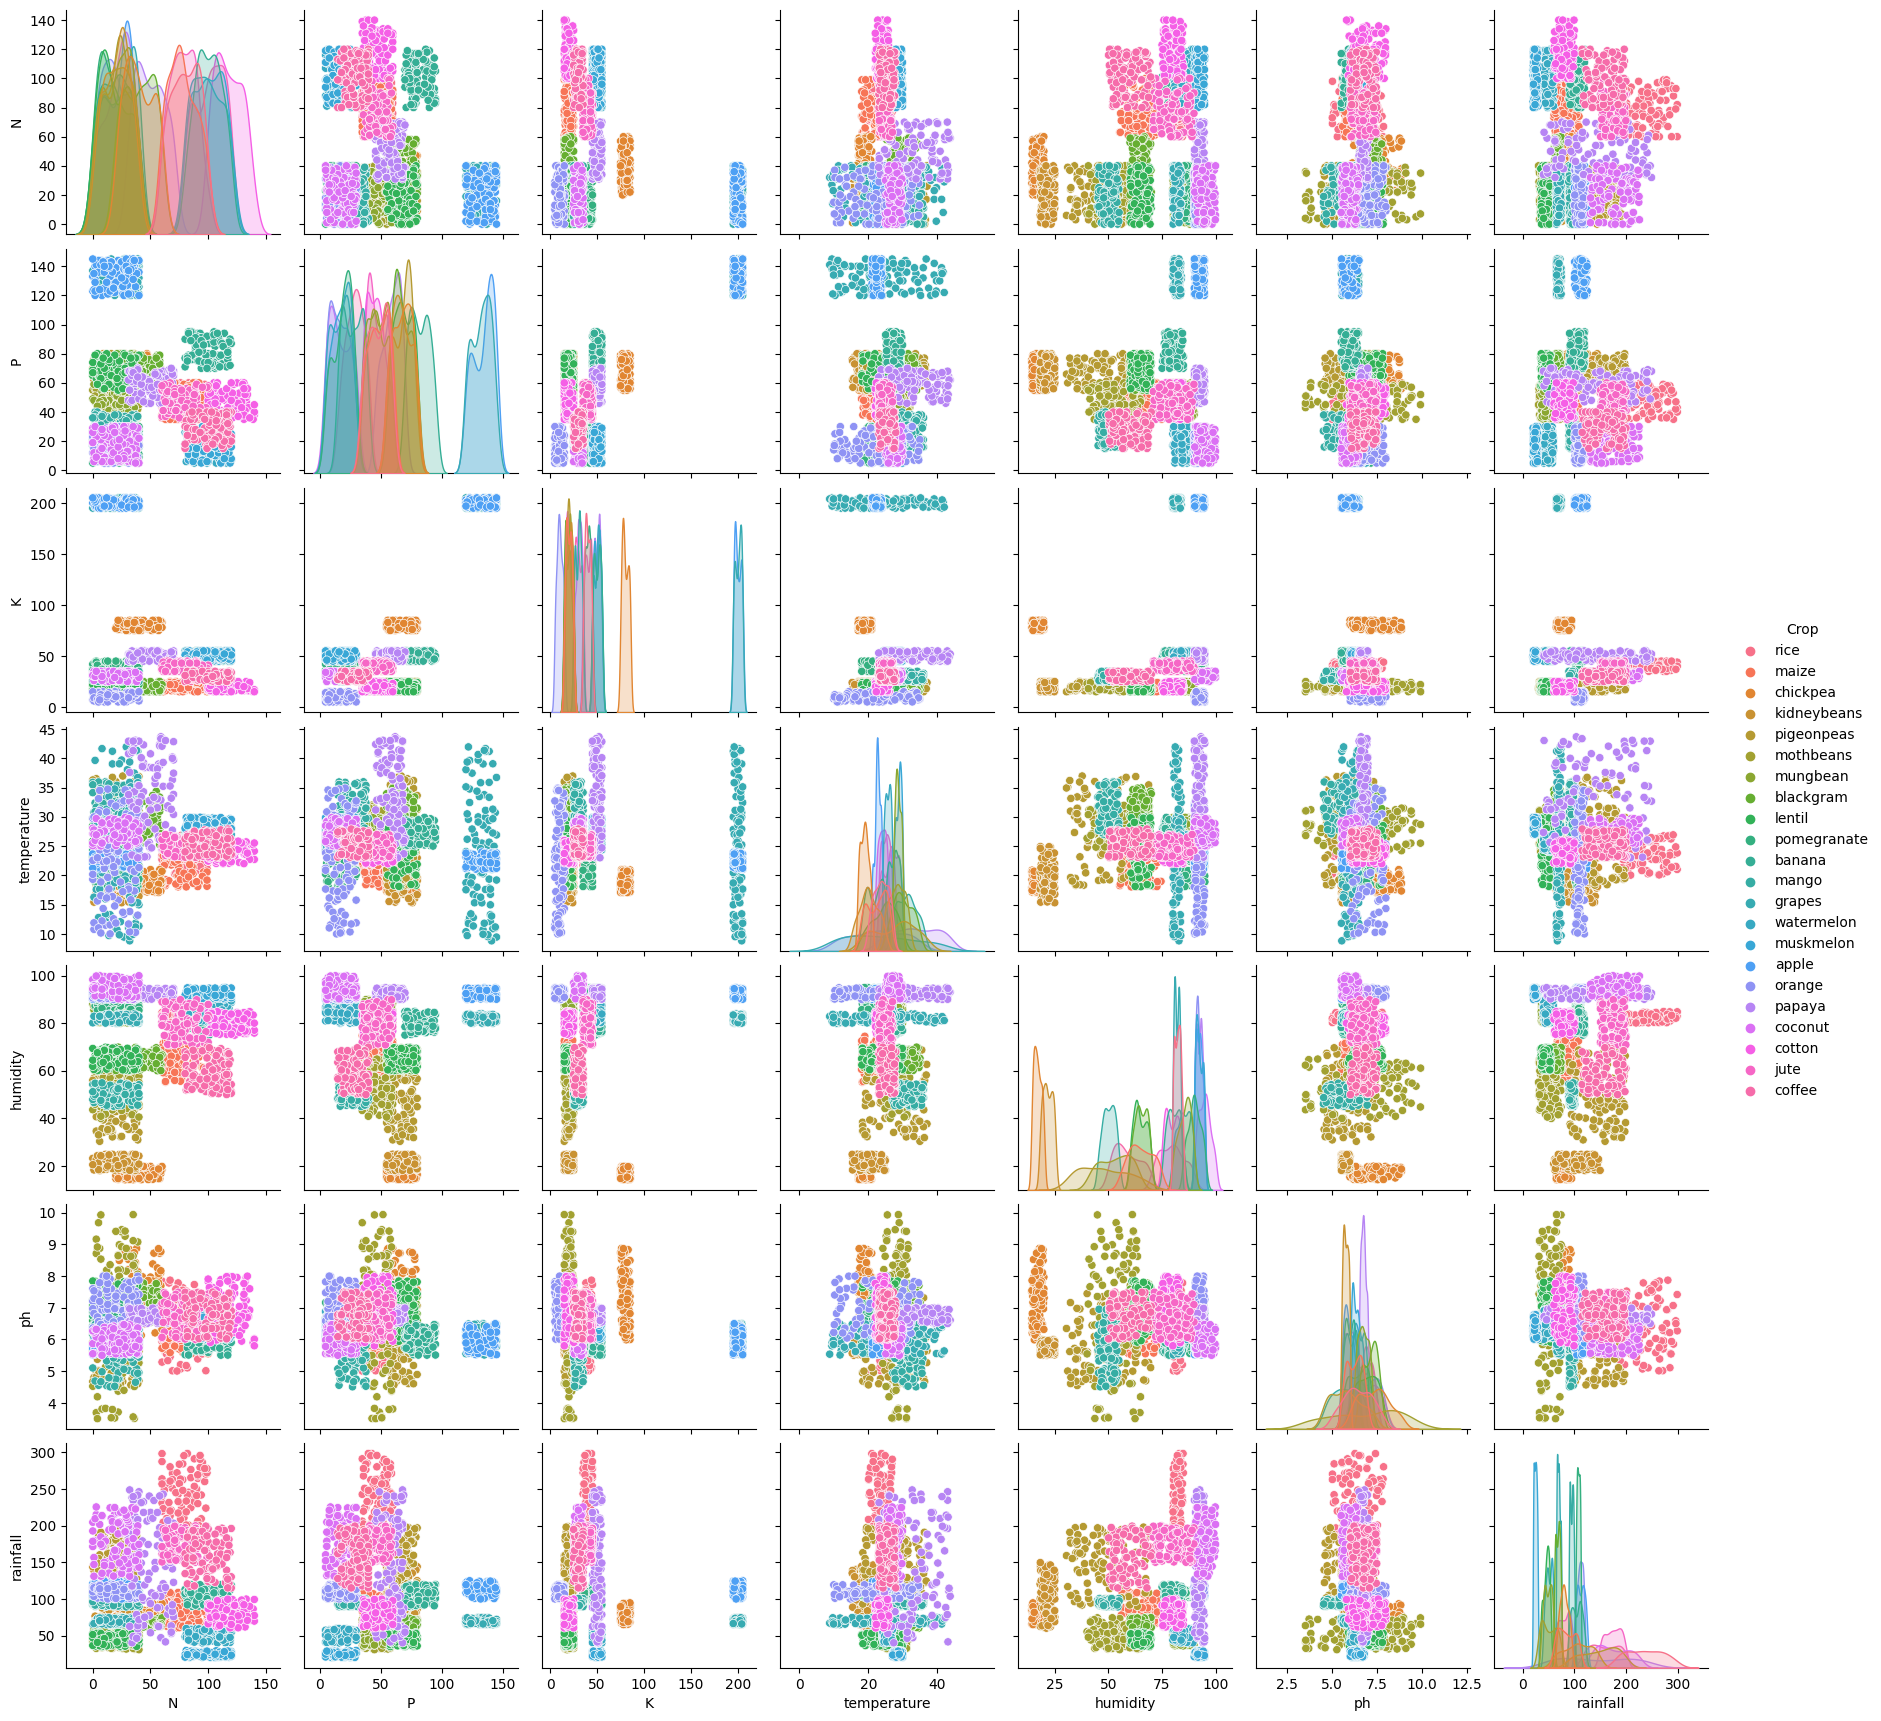

In [62]:
sns.pairplot(data=df,hue='Crop')
plt.show()

<AxesSubplot: >

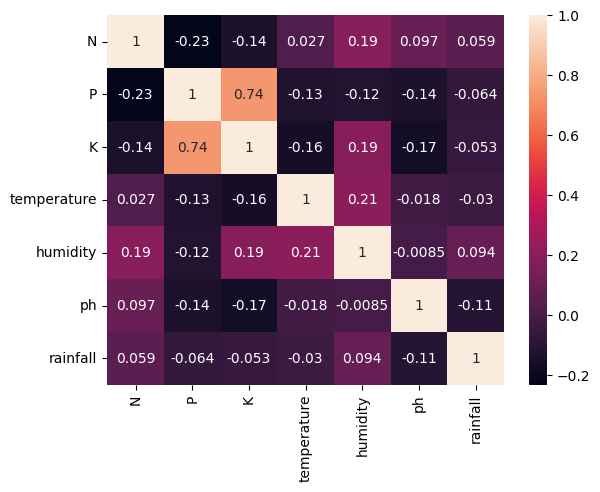

In [15]:
sns.heatmap(df.corr(),annot=True)

Outliers


In [16]:
import pandas as pd
import numpy as np

# Load the dataset into a Pandas DataFrame
demo = pd.read_csv("C:/Users/Admin/Desktop/Crop&weather/Dataset/crop_recommendation.csv")

# Select the columns with the features: N, P, K, rainfall, pH, humidity, temperature, crop, crop price
selected_columns = ['N', 'P', 'K', 'temperature','humidity', 'ph','rainfall']
data = demo[selected_columns]

# Calculate z-scores for each feature
z_scores = np.abs((data - data.mean()) / data.std())

# Define a threshold for outlier detection
threshold = 3  # Adjust this value as per your requirement

# Find the indices of rows with outliers for each feature
outlier_indices = np.where(z_scores > threshold)

# Create a list to store the row indices with outliers
outlier_rows = []

# Iterate through the outlier indices of each feature and store the unique row indices
for indices in outlier_indices:
    outlier_rows.extend(indices)

# Get the unique row indices with outliers
outlier_rows = list(set(outlier_rows))

# Print the rows with outliers
print("Rows with outliers:")
print(demo.iloc[outlier_rows])


Rows with outliers:
       N    P    K  temperature   humidity        ph    rainfall      label
1536  18  125  204    22.355482  94.478118  6.046674  116.736626      apple
514   23   45   21    31.465113  51.799394  8.985348   74.443307  mothbeans
1538  26  122  202    22.445170  94.737635  5.617227  107.184327      apple
1539  28  123  202    22.766430  92.124385  6.442289  120.435995      apple
1540  26  121  201    22.191094  90.025751  6.162034  112.312663      apple
...   ..  ...  ...          ...        ...       ...         ...        ...
1525  32  141  203    21.259411  92.844162  5.821348  109.065847      apple
503    4   43   18    29.029553  61.093875  8.840656   72.980166  mothbeans
507    5   35   20    28.929526  53.570147  9.679241   66.356341  mothbeans
1533  10  141  201    22.126594  90.978183  6.386021  104.541228      apple
1534  24  142  202    22.537797  91.481358  5.710820  101.847477      apple

[174 rows x 8 columns]


In [17]:
df_cleaned = data.drop(outlier_rows)

# Print the cleaned dataset
print("Cleaned dataset:")
print(df_cleaned)

Cleaned dataset:
        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
4      78  42  42    20.130175  81.604873  7.628473  262.717340
7      94  53  40    20.277744  82.894086  5.718627  241.974195
8      89  54  38    24.515881  83.535216  6.685346  230.446236
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2026 rows x 7 columns]


### Seperating features and target label

In [18]:
# features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
# target = df['Crop']
# #features = df[['temperature', 'humidity', 'ph', 'rainfall']]
# labels = df['Crop']

features=demo[['N','P','K','temperature','humidity','ph','rainfall']]
target=demo['label']
labels=demo['label']

In [19]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [20]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import mean_squared_error
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [24]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [25]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = "C:/Users/Admin/Desktop/Crop&weather/models/DecisionTree.pkl"
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [27]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [28]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = "C:/Users/Admin/Desktop/Crop&weather/models/NBClassifier.pkl"
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [30]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [31]:
#Saving trained SVM model

In [32]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = "C:/Users/Admin/Desktop/Crop&weather/models/SVMClassifier.pkl"
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [34]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

### Saving trained Logistic Regression model

In [35]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = "C:/Users/Admin/Desktop/Crop&weather/models/LogisticRegression.pkl"
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [37]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [38]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = "C:/Users/Admin/Desktop/Crop&weather/models/RandomForest.pkl"
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [39]:
import xgboost as xgb
XB = xgb.XGBClassifier()
#XB.fit(Xtrain,Ytrain)

# predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      

In [40]:
# Cross validation score (XGBoost)
# score = cross_val_score(XB,features,target,cv=5)
# score

### Saving trained XGBoost model

In [41]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = "C:/Users/Admin/Desktop/Crop&weather/models/XGBoost.pkl"
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

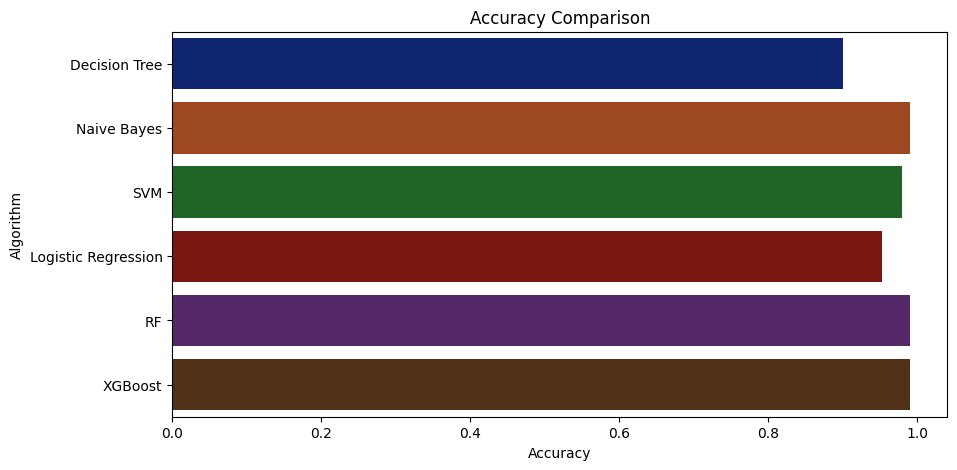

In [42]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [43]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.990909090909091


## Making a prediction

In [44]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [45]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


Weather Forecasting

In [46]:
x=pd.read_csv("C:/Users/Admin/Desktop/Crop&weather/Dataset/crop_recommendation.csv")
print(x)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


PreProcessing the weather data

In [47]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [49]:
x["temperature"].describe()

count    2200.000000
mean       25.616244
std         5.063749
min         8.825675
25%        22.769375
50%        25.598693
75%        28.561654
max        43.675493
Name: temperature, dtype: float64

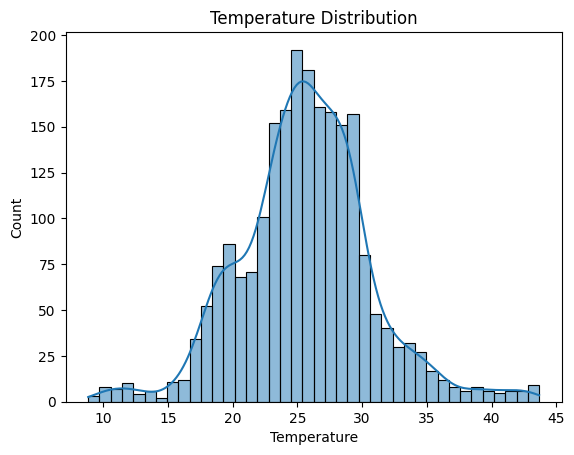

In [50]:
temp=x['temperature']
hum=x['humidity']
data=pd.DataFrame({'Temperature':temp,'Humidity':hum})


sns.histplot(data['Temperature'], kde=True)
plt.title('Temperature Distribution')
plt.show()


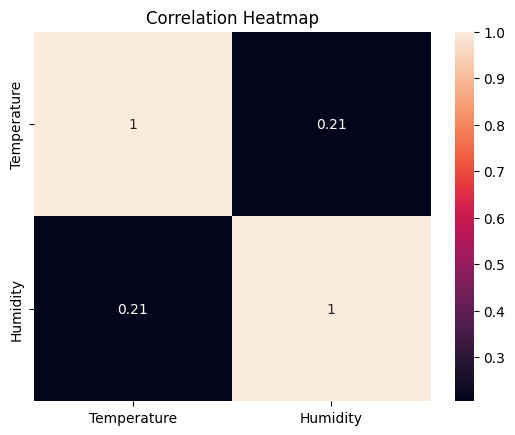

In [51]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

Linear Regression

In [52]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame called 'data' with columns: temperature, humidity, rainfall

# Splitting the data into features (X) and target variable (y)
X = x[['humidity', 'rainfall']]
y = x['temperature']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the temperature on the test set
y_pred = model.predict(X_test)
# print("Prediction =",y_pred)

# Evaluating the model (e.g., calculating the mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 22.73423029992996


In [53]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame called 'data' with columns: temperature, humidity, rainfall, and weather_condition (target variable)

# Splitting the data into features (X) and target variable (y)
X = x[['temperature', 'humidity', 'rainfall']]
y = x['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicting the weather conditions on the test set
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9022727272727272
